In [43]:
# import the package
import numpy as np
import matplotlib.pyplot as plt
import control as ct
from control.matlab import *
from scipy.signal import lsim

In [11]:
# Time vector
# Time is 'negative' here only for curiosity
t = np.linspace(-1,3,100)
t

array([-1.        , -0.95959596, -0.91919192, -0.87878788, -0.83838384,
       -0.7979798 , -0.75757576, -0.71717172, -0.67676768, -0.63636364,
       -0.5959596 , -0.55555556, -0.51515152, -0.47474747, -0.43434343,
       -0.39393939, -0.35353535, -0.31313131, -0.27272727, -0.23232323,
       -0.19191919, -0.15151515, -0.11111111, -0.07070707, -0.03030303,
        0.01010101,  0.05050505,  0.09090909,  0.13131313,  0.17171717,
        0.21212121,  0.25252525,  0.29292929,  0.33333333,  0.37373737,
        0.41414141,  0.45454545,  0.49494949,  0.53535354,  0.57575758,
        0.61616162,  0.65656566,  0.6969697 ,  0.73737374,  0.77777778,
        0.81818182,  0.85858586,  0.8989899 ,  0.93939394,  0.97979798,
        1.02020202,  1.06060606,  1.1010101 ,  1.14141414,  1.18181818,
        1.22222222,  1.26262626,  1.3030303 ,  1.34343434,  1.38383838,
        1.42424242,  1.46464646,  1.50505051,  1.54545455,  1.58585859,
        1.62626263,  1.66666667,  1.70707071,  1.74747475,  1.78

Text(0.5, 1.0, 'Step Input')

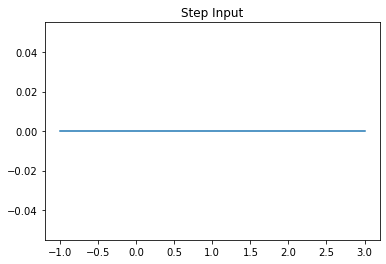

In [12]:
# Impulse
impulse_input = t==0;
plt.plot(t,impulse_input)
plt.title('Step Input')

Text(0.5, 1.0, 'Step Input')

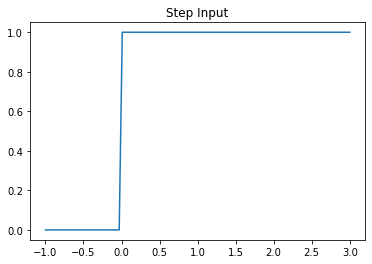

In [13]:
# Step
step_input = t>=0;
plt.plot(t,step_input)
plt.title('Step Input')

Text(0.5, 1.0, 'Ramp Input')

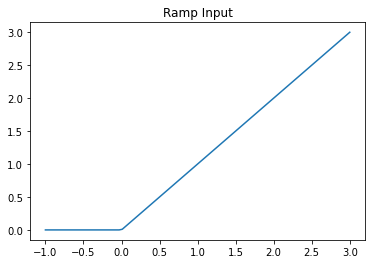

In [15]:
# Ramp Input
ramp = t*step_input;
plt.plot(t,ramp)
plt.title('Ramp Input')

In [19]:
# Example DC Motor
# Dynamical system with differents inputs
# Reference Feedback Control of Dynamic Systems, Gene F. Franklin
Jm = 0.01;  # [kg.m^2]
b = 0.001;  # [N.m.s]
Kt = 1;     # [Adimensional]
Ke = 1;     # [Adimensional]
Ra = 10;    # [Ohms]
La = 1;     # [H]

s = tf('s');    # Laplace variable (s = jw)

# Motor DC transfer function
G = Kt / ( s*((Jm*s + b)*(La*s + Ra) + Kt*Ke) );

# Poles
pole(G)

array([-5.05+8.68892974j, -5.05-8.68892974j,  0.  +0.j        ])

In [26]:
if len(zero(G))==0:
    print('Does not have zeros')
else:
    zero(G)

Does not have zeros


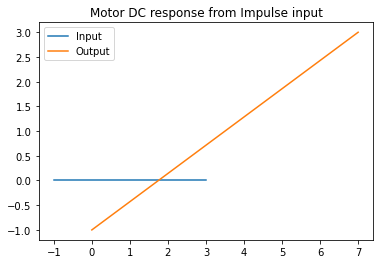

In [36]:
# Motor response

impulse_input = t==0;
step_input = t>=0;
ramp = t*step_input;

# Impulse
plt.plot(t,impulse_input)
t1, y_imp = impulse(G);
plt.plot(y_imp,t)
plt.title('Motor DC response from Impulse input')
plt.legend(['Input','Output'])

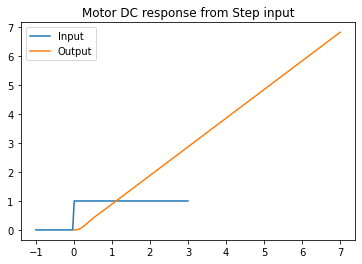

In [63]:
# Step 
plt.plot(t,step_input)
t1, y_step = step(G)
plt.plot(y_step, t1)
plt.title('Motor DC response from Step input')
plt.legend(['Input','Output'])

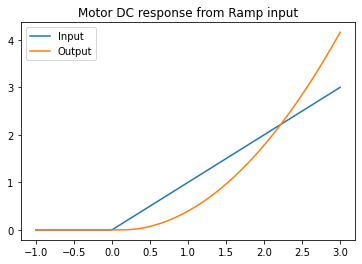

In [64]:
# Ramp
[T,Y,X] = lsim(G, ramp, t);
plt.plot(t,ramp)
plt.plot(Y,T)
plt.title('Motor DC response from Ramp input')
plt.legend(['Input','Output'])

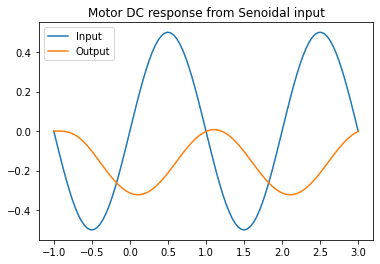

In [65]:
# Senoidal input
sin_input = 0.5 * np.sin(np.pi*t);  # 1Hz
plt.plot(t,sin_input)
[T,Y,X] = lsim(G, sin_input, t);  # System response
plt.plot(Y,T)
plt.title('Motor DC response from Senoidal input')
plt.legend(['Input','Output'])